<h2>Rutuja Dhamdhere</h2>|

<h4>The data set contains 416 liver patient records and 167 non liver patient records
collected from North East of Andhra Pradesh, India. The "Dataset" column is a class
label used to divide groups into liver patient (liver disease) or not (no disease). This
data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".
Attributes/Columns:
• Age of the patient
• Gender of the patient
• Total Bilirubin
• Direct Bilirubin
• Alkaline Phosphotase
• Alamine Aminotransferase
</h4>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import joblib
from flask import Flask, request, jsonify


<h3>exploring the data</h3>

In [ ]:
df = pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


In [ ]:
df.dtypes # for knowing the type of attributes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
df.describe  # for describing dataset

<bound method NDFrame.describe of      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase   
0     65  Female              0.7               0.1                 187.0  \
1     62    Male             10.9               5.5                 699.0   
2     62    Male              7.3               4.1                 490.0   
3     58    Male              1.0               0.4                 182.0   
4     72    Male              3.9               2.0                 195.0   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                 500.0   
579   40    Male              0.6               0.1                  98.0   
580   52    Male              0.8               0.2                 245.0   
581   31    Male              1.3               0.5                 184.0   
582   38    Male              1.0               0.3                 216.0   

     Alamine_Aminotransferase  Aspartate_

In [ ]:
df.isnull().sum() # to check the null value

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

In [ ]:
for i in df.columns:
    print(i,df[i].nunique())

Age 72
Gender 3
Total_Bilirubin 113
Direct_Bilirubin 80
Alkaline_Phosphotase 262
Alamine_Aminotransferase 151
Aspartate_Aminotransferase 177
Total_Protiens 58
Albumin 40
Albumin_and_Globulin_Ratio 69
Dataset 2


In [ ]:
# LabelEncoder is used for converting categorical string columns to numeric.
category_cols = ['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio', 'Dataset']
le = LabelEncoder()
for col in category_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,58,0,3,0,72,6,8,34,21,31,0
1,55,1,69,45,235,54,86,41,20,23,0
2,55,1,56,36,202,50,58,36,21,30,0
3,52,1,6,3,67,4,10,34,22,37,0
4,64,1,35,19,80,17,49,39,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...
578,53,1,1,0,204,10,24,25,4,2,1
579,34,1,2,0,5,25,21,26,20,42,0
580,46,1,4,1,118,38,39,30,20,37,0
581,25,1,9,4,69,19,22,34,22,37,0


<h3>Finding correlation</h3>

Attributes with correlation > 0.5:
                       level_0                     level_1         0
3              Total_Bilirubin            Direct_Bilirubin  0.957105
4              Total_Bilirubin  Aspartate_Aminotransferase  0.504972
5             Direct_Bilirubin             Total_Bilirubin  0.957105
9     Alamine_Aminotransferase  Aspartate_Aminotransferase  0.803791
10  Aspartate_Aminotransferase             Total_Bilirubin  0.504972
11  Aspartate_Aminotransferase    Alamine_Aminotransferase  0.803791
14              Total_Protiens                     Albumin  0.778525
15                     Albumin              Total_Protiens  0.778525
17                     Albumin  Albumin_and_Globulin_Ratio  0.736814
18  Albumin_and_Globulin_Ratio                     Albumin  0.736814


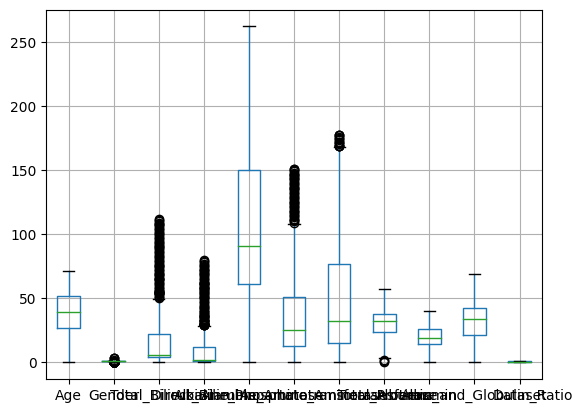

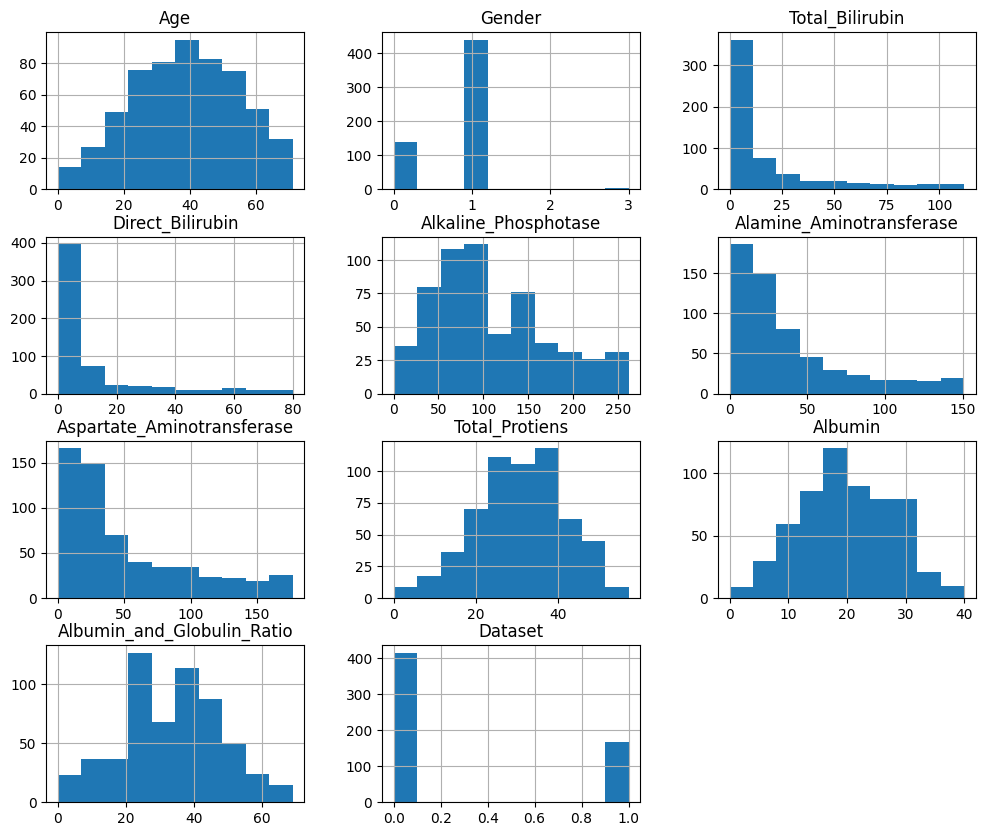

In [ ]:
correlations = df.corr()
high_corr_attributes = correlations[correlations > 0.5].stack().reset_index()
high_corr_attributes = high_corr_attributes[high_corr_attributes['level_0'] != high_corr_attributes['level_1']]
print("Attributes with correlation > 0.5:")
print(high_corr_attributes)

# Visualize attributes and detect outliers
df.boxplot()
plt.show()

# Plot distribution plots
df.hist(figsize=(12, 10))
plt.show()

<h3>finding missing value</h3>

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Fill missing values (if any)
# Example: Fill missing values with the mean
df.fillna(df.mean(), inplace=True)

Missing values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


<h3>Normalization</h3>

In [ ]:
scaler = MinMaxScaler()
normalize_df = scaler.fit_transform(df.iloc[:, :-1])
normalize_df = pd.DataFrame(normalize_df, columns=df.columns[:-1])
normalize_df['Dataset'] = df['Dataset']  # Add back the column

In [ ]:
# Split the data into features (X) and target (y)
X = normalize_df.iloc[:, :-1]
y = normalize_df['Dataset']

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_classifier, X, y, cv=4)

# Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_scores = cross_val_score(nb_classifier, X, y, cv=4)

<h3>Hyperparameter</h3>

In [ ]:
# Hyperparameter optimization using Grid Search
# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=4)
dt_grid_search.fit(X, y)
dt_best_model = dt_grid_search.best_estimator_

# Hyperparameter optimization using Random Search
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_random_search.fit(X, y)
dt_random_best_model = dt_random_search.best_estimator_
b=dt_random_best_model.predict(x_test)
accuracy_score(y_test, b)

0.7435897435897436

In [ ]:
from sklearn.model_selection import StratifiedKFold

nb_classifier = GaussianNB()
skf = StratifiedKFold(n_splits=5)
nb_scores = cross_val_score(nb_classifier, X, y, cv=skf)

<h3>splitting the data</h3>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

# Create and fit the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb




0.5555555555555556

In [ ]:
confusion_nb = confusion_matrix(y_test, y_pred_nb)
confusion_nb

array([[34, 46],
       [ 6, 31]])

In [ ]:
# Evaluate the models
# Perform grid search using cross-validation
dt_grid_search = GridSearchCV(nb_classifier, param_grid_nb, cv=5)
dt_grid_search.fit(X, y)

# Get the best model from the grid search
dt_best_model = dt_grid_search.best_estimator_
y_pred_dt = dt_best_model.predict(X)
accuracy_dt = accuracy_score(y, y_pred_dt)
confusion_dt = confusion_matrix(y, y_pred_dt)
precision_dt = precision_score(y, y_pred_dt, average='micro')
recall_dt = recall_score(y, y_pred_dt, average='micro')

f1_score_dt = f1_score(y, y_pred_dt, average='micro')


y_pred_nb = nb_classifier.predict(X)
accuracy_nb = accuracy_score(y, y_pred_nb)
confusion_nb = confusion_matrix(y, y_pred_nb)
precision_nb = precision_score(y, y_pred_nb, average='micro')
recall_nb = recall_score(y, y_pred_nb, average='micro')
f1_score_nb = f1_score(y, y_pred_nb, average='micro')
print(accuracy_nb)

0.6243567753001715


In [ ]:
# Create a DataFrame with the model names and their respective scores
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Naïve Bayes'],
    'Accuracy': [accuracy_dt, accuracy_nb],
    'Precision': [precision_dt, precision_nb],
    'Recall': [recall_dt, recall_nb],
    'F1-Score': [f1_score_dt, f1_score_nb]
})

# Save the DataFrame to a CSV file
results.to_csv('classification_results.csv', index=False)

In [ ]:
import pickle

# Train the model (example using Decision Tree classifier)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

# Store the trained model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(dt_random_best_model, file)

In [ ]:
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Print and explain the content of the model
print(loaded_model)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)


In [ ]:
S